In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('Hitters_Data.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [4]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [5]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [6]:
dummies

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [7]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [8]:
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [9]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [10]:
#The Ridge() function has an alpha argument (λ , but with a different name!) that is used to tune the model. 
#We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios 
#from the null model containing only the intercept, to the least squares fit
alphas = 10**np.linspace(5,-2,100)*0.5
alphas

array([5.00000000e+04, 4.24876718e+04, 3.61040451e+04, 3.06795364e+04,
       2.60700414e+04, 2.21531073e+04, 1.88246790e+04, 1.59963357e+04,
       1.35929412e+04, 1.15506485e+04, 9.81520325e+03, 8.34050269e+03,
       7.08737081e+03, 6.02251770e+03, 5.11765511e+03, 4.34874501e+03,
       3.69536102e+03, 3.14014572e+03, 2.66834962e+03, 2.26743925e+03,
       1.92676430e+03, 1.63727458e+03, 1.39127970e+03, 1.18224471e+03,
       1.00461650e+03, 8.53676324e+02, 7.25414389e+02, 6.16423370e+02,
       5.23807876e+02, 4.45107543e+02, 3.78231664e+02, 3.21403656e+02,
       2.73113861e+02, 2.32079442e+02, 1.97210303e+02, 1.67580133e+02,
       1.42401793e+02, 1.21006413e+02, 1.02825615e+02, 8.73764200e+01,
       7.42484131e+01, 6.30928442e+01, 5.36133611e+01, 4.55581378e+01,
       3.87131841e+01, 3.28966612e+01, 2.79540509e+01, 2.37540508e+01,
       2.01850863e+01, 1.71523464e+01, 1.45752653e+01, 1.23853818e+01,
       1.05245207e+01, 8.94324765e+00, 7.59955541e+00, 6.45774833e+00,
      

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
Xscaled = scaler.fit_transform(X)


In [12]:
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(Xscaled, y)
    coefs.append(ridge.coef_)
np.shape(coefs)

(100, 19)

Text(0, 0.5, 'weights')

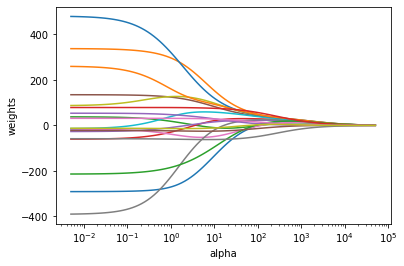

In [13]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [14]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(Xscaled, y, test_size=0.3, random_state=1)

In [16]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE
print(mean_squared_error(y_train, ridge2.predict(X_train)))  

AtBat         -220.532089
Hits           236.456580
HmRun          -48.753373
Runs           -24.931804
RBI             67.830393
Walks          104.699548
Years          -26.126689
CAtBat         -92.935675
CHits          119.041553
CHmRun          98.477952
CRuns           97.144911
CRBI           104.584537
CWalks        -120.951394
PutOuts         90.509332
Assists         -1.252480
Errors          -1.385700
League_N         5.865478
Division_W     -61.299571
NewLeague_N     10.638564
dtype: float64
117545.30589760638
90219.18876887347


In [19]:
ridge3 = Ridge(alpha = 10**10)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

AtBat          3.435376e-06
Hits           3.877024e-06
HmRun          2.894370e-06
Runs           3.587772e-06
RBI            4.162908e-06
Walks          3.941451e-06
Years          3.217177e-06
CAtBat         4.260224e-06
CHits          4.503289e-06
CHmRun         4.615683e-06
CRuns          4.529955e-06
CRBI           4.862952e-06
CWalks         3.931205e-06
PutOuts        3.533837e-06
Assists       -1.123867e-07
Errors         1.091135e-07
League_N      -5.499140e-07
Division_W    -1.493794e-06
NewLeague_N   -3.717527e-07
dtype: float64
199950.8117641149


In [20]:
ridge4 = Ridge(alpha = 0)
ridge4.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge4.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge4.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

AtBat         -326.835481
Hits           342.581906
HmRun          -25.524311
Runs           -57.630447
RBI             56.537225
Walks          122.792855
Years           33.414438
CAtBat        -759.992155
CHits          696.528732
CHmRun         166.021702
CRuns          139.827453
CRBI            46.264406
CWalks        -126.225831
PutOuts         86.862929
Assists         19.402735
Errors          -0.946502
League_N        14.478360
Division_W     -62.411106
NewLeague_N      6.741578
dtype: float64
125103.46654706862


Text(0, 0.5, 'weights')

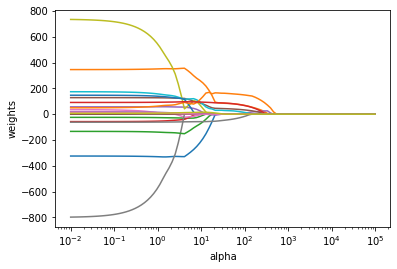

In [21]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [22]:
lasso2 = Lasso(alpha=100,max_iter = 10000)
lasso2.fit(X_train, y_train)             # Fit a Lasso regression on the training data
pred2 = lasso2.predict(X_test)           # Use this model to predict the test data
lasso2.fit(X_train, y_train)
print(pd.Series(lasso2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

AtBat            0.000000
Hits            41.602083
HmRun            0.000000
Runs             0.000000
RBI             12.711488
Walks           21.020393
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun           0.000000
CRuns            0.000000
CRBI           120.743909
CWalks           0.000000
PutOuts         38.201195
Assists         -0.000000
Errors           0.000000
League_N        -0.000000
Division_W      -0.000000
NewLeague_N      0.000000
dtype: float64
137561.29540440056


In [ ]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso2.coef_, index=X.columns)

In [23]:
lasso3 = Lasso(alpha=0.02,max_iter = 10000)
lasso3.fit(X_train, y_train)             # Fit a Lasso regression on the training data
pred3 = lasso3.predict(X_test)           # Use this model to predict the test data
lasso3.fit(X_train, y_train)
print(pd.Series(lasso3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

AtBat         -327.007516
Hits           342.771647
HmRun          -25.586511
Runs           -57.488333
RBI             56.522206
Walks          122.746996
Years           32.539428
CAtBat        -751.786232
CHits          689.603057
CHmRun         165.398240
CRuns          139.525834
CRBI            46.762302
CWalks        -126.410492
PutOuts         86.913388
Assists         19.174803
Errors          -0.844911
League_N        14.356149
Division_W     -62.377013
NewLeague_N      6.783182
dtype: float64
124993.81423291717


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lambdas = np.linspace(0.01,300,num=1000)
scoresCV = []
for l in lambdas:
    RidgeReg = Ridge(alpha=l)
    RidgeReg.fit(X_train, y_train)    
    scoreCV = cross_val_score(RidgeReg, X_train, y_train, scoring='neg_mean_squared_error',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([l,-1*np.mean(scoreCV)])
df = pd.DataFrame(scoresCV,columns=['Lambda','Validation Error'])
df

,Lambda,Validation Error
0,0.010000,121478.402448
1,0.310290,117469.666863
2,0.610581,116736.063799
3,0.910871,116448.707173
4,1.211161,116332.703658
...,...,...
995,298.798839,122455.423905
996,299.099129,122461.551231
997,299.399419,122467.680401
998,299.699710,122473.811408


In [31]:
df.sort_values(['Validation Error'])
df

,Lambda,Validation Error
0,0.010000,121867.878624
1,0.310290,119382.206550
2,0.610581,118193.486326
3,0.910871,117836.703118
4,1.211161,117858.920490
...,...,...
995,298.798839,206203.236284
996,299.099129,206203.236284
997,299.399419,206203.236284
998,299.699710,206203.236284


In [26]:
ridgecv = RidgeCV(alphas = alphas,cv = 10, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

1.2676822469850557

In [27]:
ridge5 = Ridge(alpha = ridgecv.alpha_)
ridge5.fit(X_train, y_train)
mean_squared_error(y_test, ridge5.predict(X_test))

119315.43787528171

In [28]:
ridge5.fit(X, y)
pd.Series(ridge5.coef_, index = X.columns)

AtBat           -1.988149
Hits             7.517143
HmRun            4.300154
Runs            -2.371589
RBI             -1.025890
Walks            6.226235
Years           -3.462565
CAtBat          -0.170990
CHits            0.128253
CHmRun          -0.180378
CRuns            1.461480
CRBI             0.810693
CWalks          -0.811439
PutOuts          0.282187
Assists          0.371422
Errors          -3.328251
League_N        56.796641
Division_W    -114.478983
NewLeague_N    -19.292807
dtype: float64

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lambdas = np.linspace(0.01,300,num=1000)
scoresCV = []
for l in lambdas:
    lassoReg = Lasso(alpha=l,max_iter=10000)
    lassoReg.fit(X_train, y_train)    
    scoreCV = cross_val_score(lassoReg, X_train, y_train, scoring='neg_mean_squared_error',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([l,-1*np.mean(scoreCV)])
df = pd.DataFrame(scoresCV,columns=['Lambda','Validation Error'])
df

,Lambda,Validation Error
0,0.010000,121867.878624
1,0.310290,119382.206550
2,0.610581,118193.486326
3,0.910871,117836.703118
4,1.211161,117858.920490
...,...,...
995,298.798839,206203.236284
996,299.099129,206203.236284
997,299.399419,206203.236284
998,299.699710,206203.236284


In [32]:
df.sort_values(['Validation Error'])

,Lambda,Validation Error
3,0.910871,117836.703118
4,1.211161,117858.920490
2,0.610581,118193.486326
5,1.511451,118405.205317
68,20.429740,118738.728941
...,...,...
965,289.790130,206203.236284
966,290.090420,206203.236284
967,290.390711,206203.236284
969,290.991291,206203.236284


In [33]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

121440.96100652739

In [34]:
lassocv.alpha_

0.7527099336768498

In [35]:
pd.Series(lasso.coef_, index=X.columns)

AtBat         -332.171667
Hits           347.749254
HmRun          -28.043191
Runs           -51.635936
RBI             56.424899
Walks          121.031030
Years            0.510714
CAtBat        -456.163372
CHits          441.936157
CHmRun         142.775211
CRuns          127.289136
CRBI            64.691473
CWalks        -133.192356
PutOuts         88.992614
Assists         12.753863
Errors           0.000000
League_N        10.369461
Division_W     -61.237278
NewLeague_N      7.920380
dtype: float64

In [1]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
Xscaled = scaler.fit_transform(X)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-fff4c3c4e6ec>", line 3, in <module>
    Xscaled = scaler.fit_transform(X)
NameError: name 'X' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "E:\anaconda\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "E:\anaconda\lib\site-packages\IPython\core\ultratb.py", line 316, in wrapped
    retu

TypeError: object of type 'NoneType' has no len()